# Apply Linear Regression and Decision Tree Regression to the dataset and compare the results to interpret their performance

# Load the Data

In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("/content/drive/MyDrive/Atomcamp/ML/house_prices_data.xlsx")

# Explore the Data

In [3]:
df.head()

,Square_Footage,Num_Bedrooms,House_Age,House_Price
0,3674,1,61,608468.940708
1,1360,5,57,335254.995658
2,1794,5,51,402370.090653
3,1630,2,11,311854.298045
4,1595,5,38,379356.590435


In [4]:
df.isnull().sum()

,0
Square_Footage,0
Num_Bedrooms,0
House_Age,0
House_Price,0


In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Square_Footage  100 non-null    int64  
 1   Num_Bedrooms    100 non-null    int64  
 2   House_Age       100 non-null    int64  
 3   House_Price     100 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 3.2 KB


In [7]:
df.describe()

,Square_Footage,Num_Bedrooms,House_Age,House_Price
count,100.000000,100.000000,100.000000,100.000000
mean,2368.700000,2.970000,47.780000,449659.080684
std,1018.723617,1.480206,31.132684,154305.631374
min,521.000000,1.000000,0.000000,133560.988172
25%,1566.750000,1.000000,19.000000,313684.825488
50%,2468.000000,3.000000,50.000000,450938.501852
75%,3288.750000,4.000000,72.500000,568634.253802
max,3999.000000,5.000000,98.000000,756310.952144


# Visualize the data through Charts

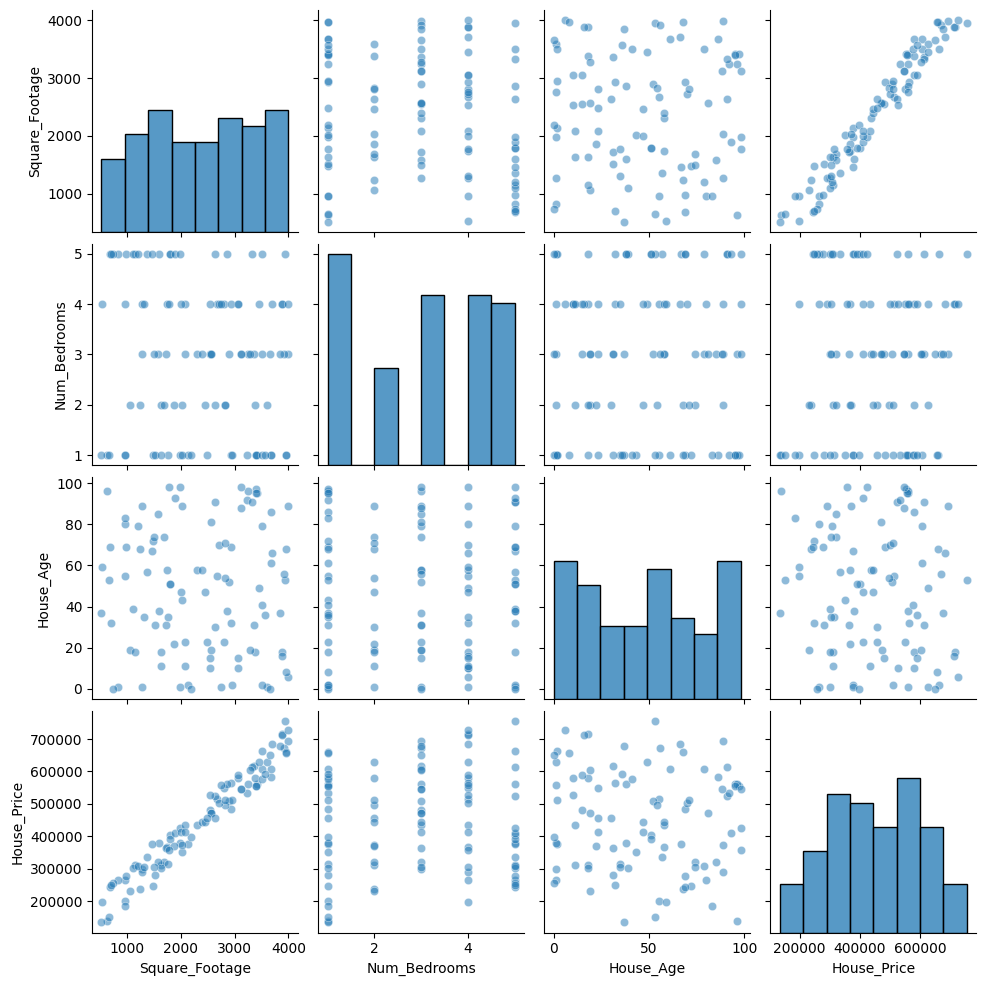

In [8]:
sns.pairplot(df, kind="scatter", plot_kws={"alpha":0.5})

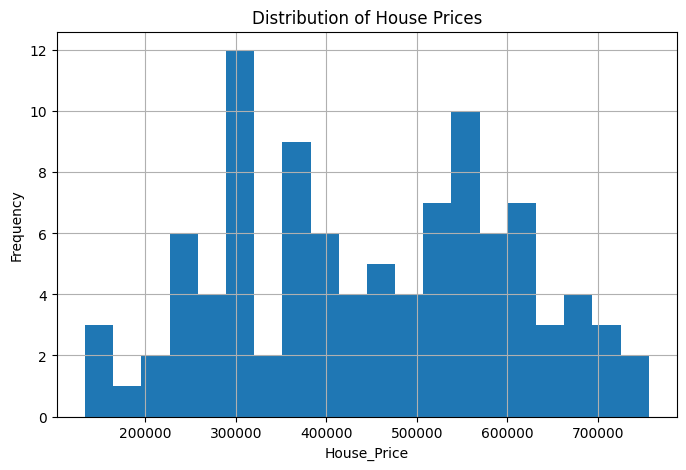

In [9]:
df["House_Price"].hist(bins=20, figsize=(8,5))
plt.title('Distribution of House Prices')
plt.xlabel('House_Price')
plt.ylabel('Frequency')
plt.show()

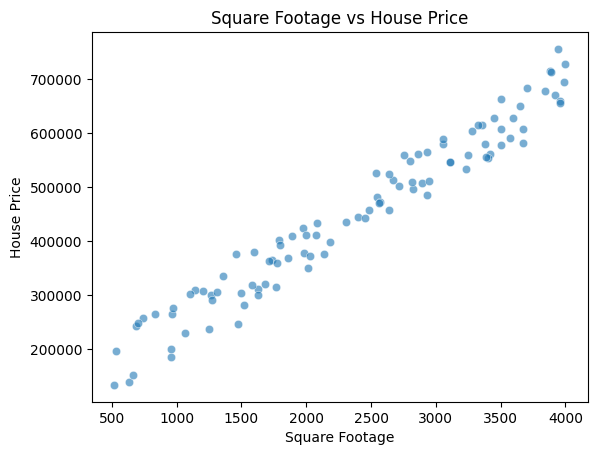

In [10]:
sns.scatterplot(x='Square_Footage', y='House_Price', data=df, alpha=0.6)

plt.title('Square Footage vs House Price')
plt.xlabel('Square Footage')
plt.ylabel('House Price')
plt.show()

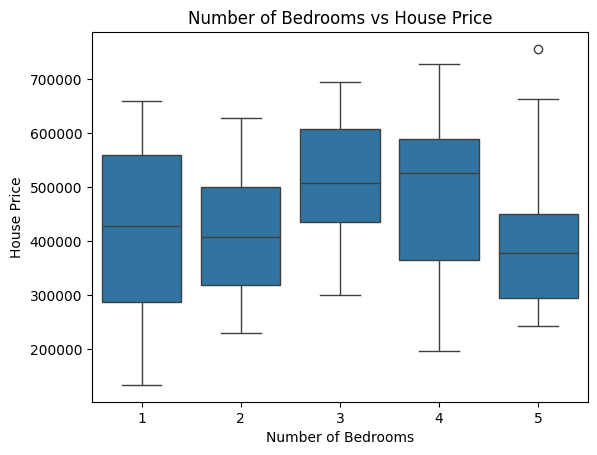

In [11]:
sns.boxplot(x='Num_Bedrooms', y='House_Price', data=df)

plt.title('Number of Bedrooms vs House Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('House Price')
plt.show()

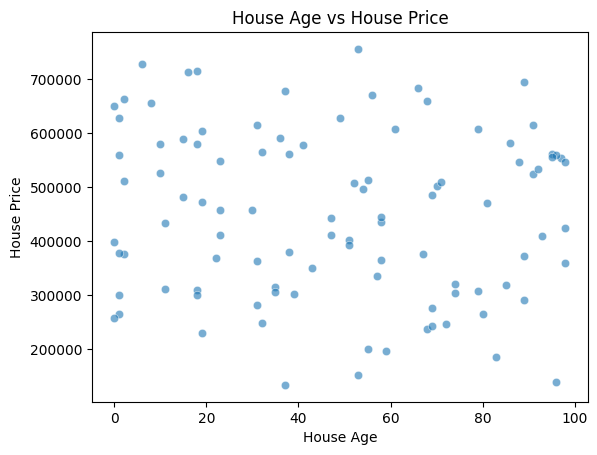

In [12]:
sns.scatterplot(x='House_Age', y='House_Price', data=df, alpha=0.6)

plt.title('House Age vs House Price')
plt.xlabel('House Age')
plt.ylabel('House Price')
plt.show()

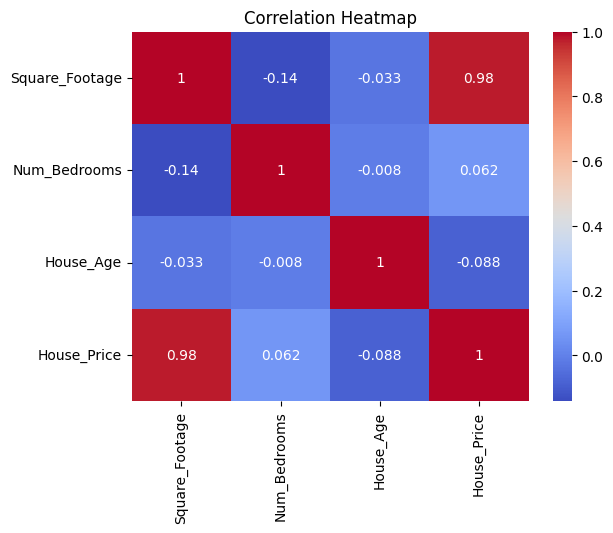

In [13]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [14]:
df.columns

Index(['Square_Footage', 'Num_Bedrooms', 'House_Age', 'House_Price'], dtype='object')

In [15]:
df.shape

(100, 4)

# Machine Learning

In [16]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['House_Price'])
y = df['House_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

<Axes: ylabel='House_Price'>

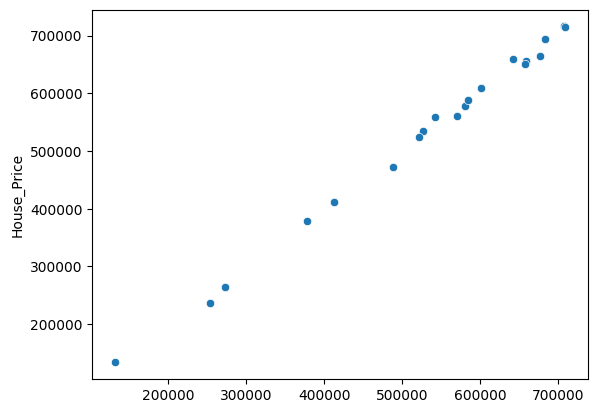

In [18]:
# Initialize the scaler and scale the features
from sklearn.preprocessing import StandardScaler # import the StandardScaler class from sklearn.preprocessing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
predictions = model.predict(X_test_scaled)
sns.scatterplot(x=predictions, y=y_test)

In [19]:
lm.coef_

array([  151.23304135, 21294.4595831 ,  -274.57263924])

# Evaluate the Model

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)

r2 = r2_score(y_test, predictions)

# Display the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²) score: {r2}")


Mean Squared Error (MSE): 91726130.73039134
R-squared (R²) score: 0.9965233213503353


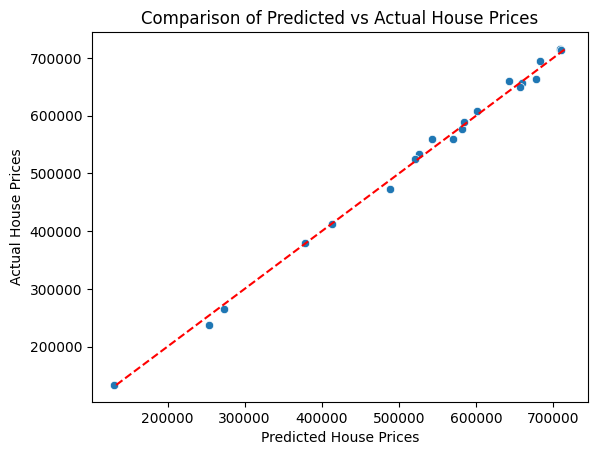

In [21]:
# Scatter plot comparing actual and predicted values
sns.scatterplot(x=predictions, y=y_test)

# Add labels and title
plt.title('Comparison of Predicted vs Actual House Prices')
plt.xlabel('Predicted House Prices')
plt.ylabel('Actual House Prices')

# Add a reference line (perfect predictions would fall on this line)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

plt.show()


In [22]:
# Function to predict house prices
def predict_house_price(square_footage, num_bedrooms, house_age):
    input_features = pd.DataFrame({
        'Square_Footage': [square_footage],
        'Num_Bedrooms': [num_bedrooms],
        'House_Age': [house_age]
    })

    # Scale the input features using the previously fitted scaler
    input_features_scaled = scaler.transform(input_features)

    # Use the trained model to predict the house price
    predicted_price = model.predict(input_features_scaled)

    return predicted_price[0]

# Example usage
# predicted_price = predict_house_price(2000, 3, 10)
# print(f"The predicted house price is: ${predicted_price:.2f}")


In [23]:
# Take input from the user
square_footage = float(input("Enter the square footage of the house: "))
num_bedrooms = int(input("Enter the number of bedrooms: "))
house_age = int(input("Enter the age of the house (in years): "))

# Call the function to predict house price
predicted_price = predict_house_price(square_footage, num_bedrooms, house_age)

# Display the predicted price
print(f"The predicted house price is: ${predicted_price:.2f}")

Enter the square footage of the house: 500
Enter the number of bedrooms: 5
Enter the age of the house (in years): 1
The predicted house price is: $223089.94


# Determine feature importance and visualize it

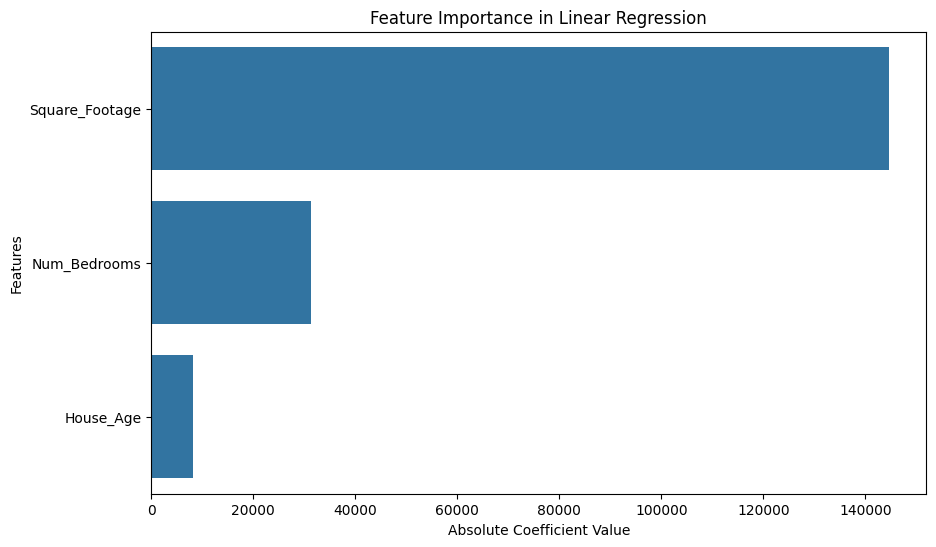

In [24]:
# Get feature importance from the model coefficients
importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
importance['Absolute_Coefficient'] = importance['Coefficient'].abs()

# Sort the DataFrame by absolute coefficient value
importance_sorted = importance.sort_values(by='Absolute_Coefficient', ascending=False)

# Visualize the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Absolute_Coefficient', y='Feature', data=importance_sorted)
plt.title('Feature Importance in Linear Regression')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Features')
plt.show()

# Normalize the data using StandardScaler from scikit-learn and check its impact on the model performance

Mean Squared Error (MSE): 91726130.73039134
R-squared (R²): 0.9965233213503353


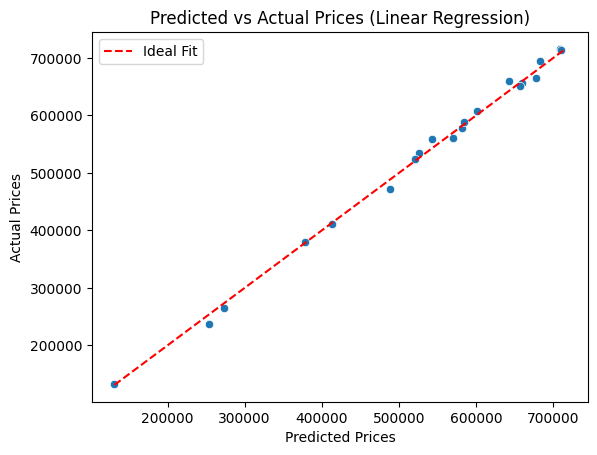

In [25]:
from sklearn.preprocessing import StandardScaler

# Step 2: Split the dataset
X = df.drop(columns=['House_Price'])
y = df['House_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize the scaler and scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Define and train the model on the scaled data
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Step 5: Make predictions on the test set
predictions = model.predict(X_test_scaled)

# Step 6: Plot the predictions vs actual values using a scatter plot
sns.scatterplot(x=predictions, y=y_test)

# Add a line where predicted values = actual values (Ideal Fit Line)
max_val = max(max(predictions), max(y_test))
min_val = min(min(predictions), min(y_test))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Fit')

# Add labels and title
plt.xlabel('Predicted Prices')
plt.ylabel('Actual Prices')
plt.title('Predicted vs Actual Prices (Linear Regression)')
plt.legend()

# Step 6: Calculate MSE and R² score
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Step 7: Print MSE and R² score
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Show the plot
plt.show()


##Linear Regression Hypertuning

Best parameters found:  {'alpha': 0.1}


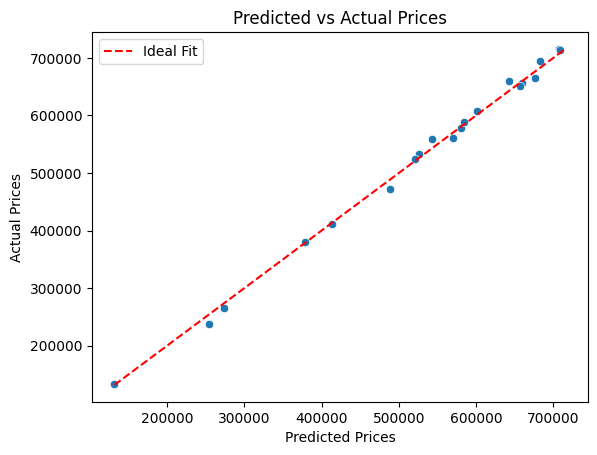

R2 Score: 0.9964756317433314
Mean Squared Error (MSE): 92984338.22303468


In [26]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


# Step 3: Define a parameter grid for hyperparameter tuning (Ridge Regression)
param_grid = {'alpha': [0.1, 1, 10, 100, 1000]}

# Step 4: Apply GridSearchCV to find the best hyperparameters
ridge = Ridge()
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Step 5: Retrieve the best model and best hyperparameters
best_ridge_model = grid_search.best_estimator_
print("Best parameters found: ", grid_search.best_params_)

# Step 6: Make predictions using the best model
predictions = best_ridge_model.predict(X_test_scaled)

# Step 7: Visualize the results
sns.scatterplot(x=predictions, y=y_test)
plt.xlabel('Predicted Prices')
plt.ylabel('Actual Prices')
plt.title('Predicted vs Actual Prices')

# Add a line where predicted values = actual values
max_val = max(max(predictions), max(y_test))
min_val = min(min(predictions), min(y_test))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Fit')

plt.legend()
plt.show()

# Step 8: Evaluate model performance (R2 Score, RMSE, and MSE)
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print(f"R2 Score: {r2}")
print(f"Mean Squared Error (MSE): {mse}")

# Decision Tree Regression

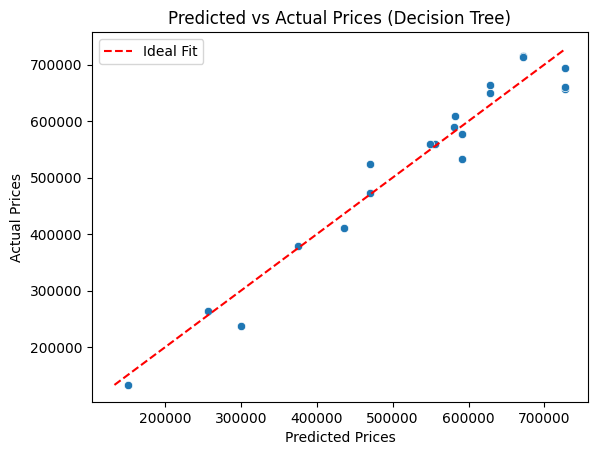

R2 Score: 0.9460526762902514
Mean Squared Error (MSE): 1423306484.662416


In [27]:
# Import necessary libraries
from sklearn.tree import DecisionTreeRegressor

# Assume df is your DataFrame and House_Price is your target variable
X = df.drop(columns=['House_Price'])
y = df['House_Price']

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Initialize the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Step 3: Train the model
dt_regressor.fit(X_train, y_train)

# Step 4: Make predictions
predictions = dt_regressor.predict(X_test)

# Step 5: Visualize the results
sns.scatterplot(x=predictions, y=y_test)
plt.xlabel('Predicted Prices')
plt.ylabel('Actual Prices')
plt.title('Predicted vs Actual Prices (Decision Tree)')

# Add a line where predicted values = actual values
max_val = max(max(predictions), max(y_test))
min_val = min(min(predictions), min(y_test))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Fit')

plt.legend()
plt.show()

# Step 6: Evaluate model performance (R2 Score, RMSE, and MSE)
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print(f"R2 Score: {r2}")
print(f"Mean Squared Error (MSE): {mse}")


#Data Normalization

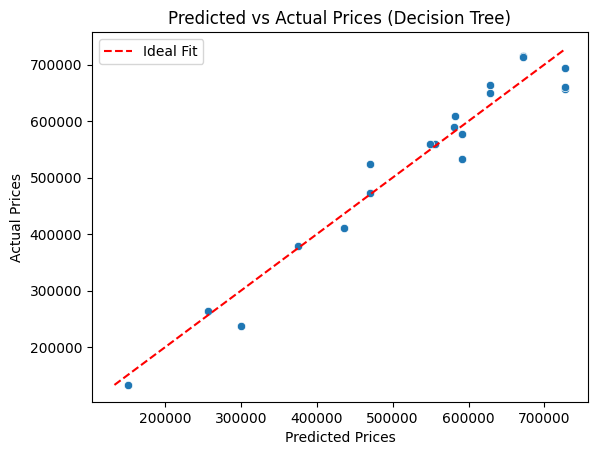

R2 Score: 0.9460526762902514
Mean Squared Error (MSE): 1423306484.662416


In [28]:
# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Initialize the scaler and scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Initialize the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Step 4: Train the model using the scaled data
dt_regressor.fit(X_train_scaled, y_train)

# Step 5: Make predictions
predictions = dt_regressor.predict(X_test_scaled)

# Step 6: Visualize the results
sns.scatterplot(x=predictions, y=y_test)
plt.xlabel('Predicted Prices')
plt.ylabel('Actual Prices')
plt.title('Predicted vs Actual Prices (Decision Tree)')

# Add a line where predicted values = actual values
max_val = max(max(predictions), max(y_test))
min_val = min(min(predictions), min(y_test))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Fit')

plt.legend()
plt.show()

# Step 7: Evaluate model performance (R2 Score, MSE)
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print(f"R2 Score: {r2}")
print(f"Mean Squared Error (MSE): {mse}")

## Decision Tree Regression Hypertuning

Best parameters found:  {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}


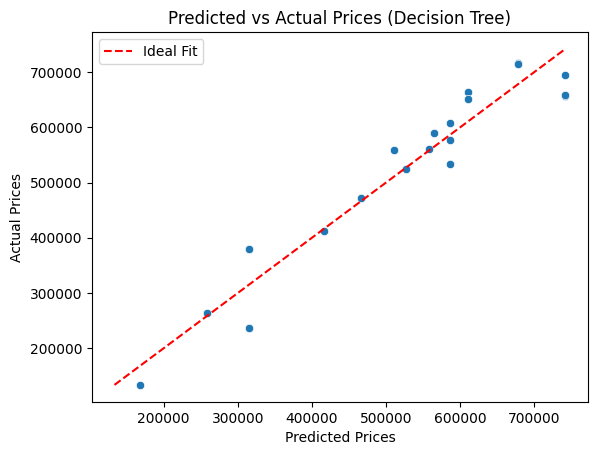

R2 Score: 0.9214813457034084
Mean Squared Error (MSE): 2071578386.8831692


In [29]:
# Step 2: Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Step 3: Initialize the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Step 4: Apply GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Step 5: Retrieve the best model
best_dt_regressor = grid_search.best_estimator_
print("Best parameters found: ", grid_search.best_params_)

# Step 6: Make predictions using the best model
predictions = best_dt_regressor.predict(X_test)

# Step 7: Visualize the results
sns.scatterplot(x=predictions, y=y_test)
plt.xlabel('Predicted Prices')
plt.ylabel('Actual Prices')
plt.title('Predicted vs Actual Prices (Decision Tree)')

# Add a line where predicted values = actual values
max_val = max(max(predictions), max(y_test))
min_val = min(min(predictions), min(y_test))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Fit')

plt.legend()
plt.show()

# Step 8: Evaluate model performance (R2 Score, RMSE, and MSE)
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print(f"R2 Score: {r2}")
print(f"Mean Squared Error (MSE): {mse}")

# Results Comparison

#Multiple linear regression outperformed decision trees, achieving an R² score of 0.9965 compared to 0.9460 for the decision tree model.